In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
brst=pd.read_csv("data.csv")

In [3]:
brst=brst.drop(columns=['id','Unnamed: 32'])

In [4]:
brst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
brst.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
brst["diagnosis"].value_counts()
brst["label"]=brst["diagnosis"].map({"M":1,"B":0})
brst['label'].value_counts()

label
0    357
1    212
Name: count, dtype: int64

In [7]:
# Prepare features and target
X = brst.drop(columns=['label', 'diagnosis'], axis=1)  # Drop both label and diagnosis
Y = brst["label"]

# Split data with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2, stratify=Y)

# Scale features
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

In [8]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Print evaluation metrics
print("Model Evaluation Metrics:\n")
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(Y_test, y_pred_proba):.4f}\n")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))

Model Evaluation Metrics:

Accuracy Score: 0.9649
ROC AUC Score: 0.9871

Confusion Matrix:
[[70  2]
 [ 2 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



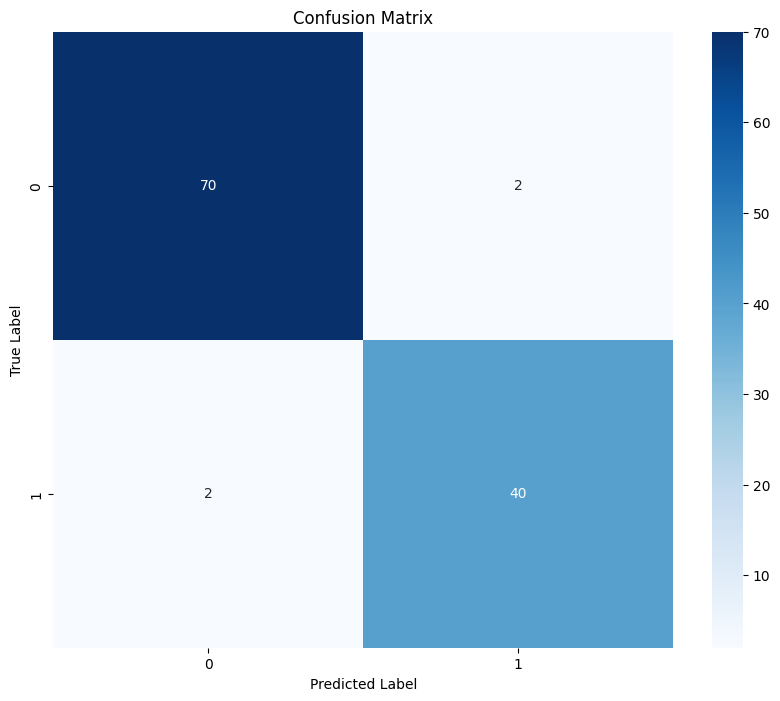

<Figure size 800x600 with 0 Axes>

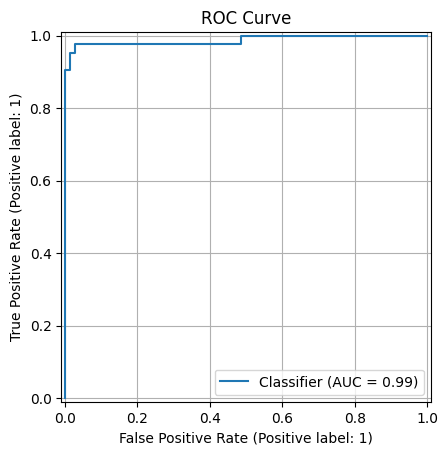

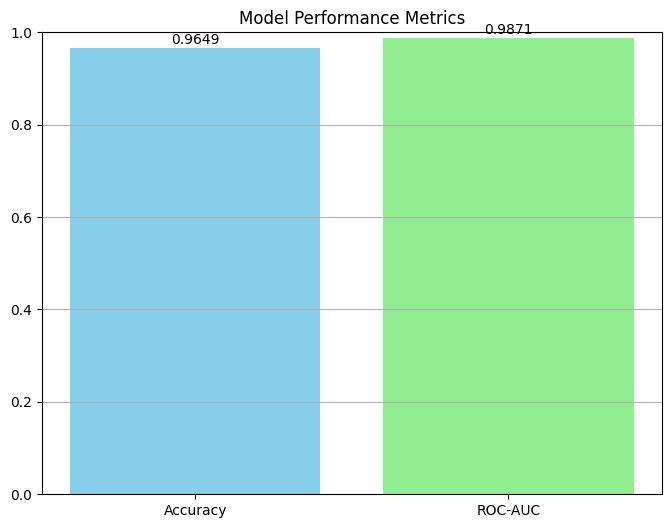

In [9]:
# Create confusion matrix heatmap
plt.figure(figsize=(10, 8))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Create ROC curve
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_predictions(Y_test, y_pred_proba)
plt.title('ROC Curve')
plt.grid(True)
plt.show()

# Create bar plot for accuracy and ROC-AUC scores
metrics = {
    'Accuracy': accuracy_score(Y_test, y_pred),
    'ROC-AUC': roc_auc_score(Y_test, y_pred_proba)
}

plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'lightgreen'])
plt.title('Model Performance Metrics')
plt.ylim(0, 1)
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.grid(axis='y')
plt.show()